In [1]:
import numpy as np
from scipy import misc
img = misc.ascent()


### Show Image : 

In [2]:
import matplotlib.pyplot as plt
def showImage(img):
    plt.grid(False)
    plt.gray()
    plt.axis('off')
    plt.imshow(img)
    plt.show()

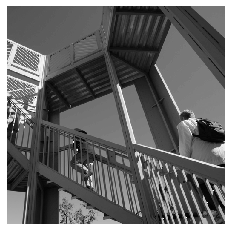

In [3]:
showImage(img)

### Transforming the image : 

In [6]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]
print(f"X : {size_x}\nY : {size_y}")

X : 512
Y : 512


### Creating the Convolution : 

In [8]:
filter = [[-1,0,1],[-2,0,2],[-1,0,1]]
weight = 1

In [14]:
for r in range(1,size_x-1):
    for c in range(1,size_y-1):
        op_pix = 0.0
        for a in [-1,0,1]:
            for b in [-1,0,1]:
                op_pix += (img[r+b,c+a] * filter[a+1][b+1])
        op_pix *= weight
        op_pix = 0 if op_pix < 0 else op_pix
        op_pix = 255 if op_pix > 255 else op_pix
        img_transformed[r,c] = op_pix

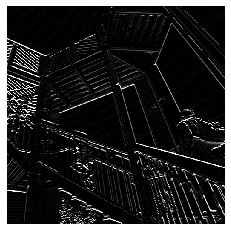

In [15]:
showImage(img_transformed)

### Add Pooling (max) : 

In [17]:
new_x = size_x//2
new_y = size_y//2
newImg = np.zeros((new_x,new_y))
for x in range(0,size_x,2):
    for y in range(0, size_y,2):
        pixels = []
        pixels.append(img_transformed[x,y])
        pixels.append(img_transformed[x+1,y])
        pixels.append(img_transformed[x,y+1])
        pixels.append(img_transformed[x+1,y+1])
        pixels.sort()
        newImg[x//2,y//2] = pixels[-1]

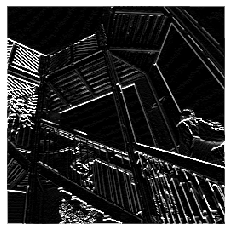

In [18]:
showImage(newImg)